# PUBG


![alt text](https://pubgmobile.proximabeta.com/event/pics/youtubegaming2560_1440.jpg)

## Outline :  what we will work on.


---

1. First & most important, How to handle that huge size of data. 
2. Then we importing this pubg data directly from kaggle to out working space. Without downloading it.
3. Third, Preprocessing the train , test data &  check out the available feature set.
4. Forth, Take down the deeper insight of Data, Perform exploratory data analysis & feature analysis.
5. Finally, We use RandomForest algorithm .  One of the famous algorithm over kaggle. And using RF we creat a pubg Placement model.  Then create a prediction on given test data.


In [1]:
# Intall dependencies
# To work with kaggle API, For directly importing the data from kaggle to google colab notebook,

!pip install kaggle



In [0]:
# importing basic libraries
#numpy # pandas # matplot #seaborn 

import numpy as np
import pandas as pd
import matplotlib.pyplot as pld
import seaborn as sns



In [3]:
# upload the kaggle json file # Kaggle Credential
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vin1234","key":"929881c20dc9da038e20c07ca1bd7818"}'}

In [4]:
# check the file.
!ls

kaggle.json  sample_data


Check out the github repo for kaggle api [Kaggle API](https://github.com/Kaggle/kaggle-api)

In [0]:
# specified by the kaggle
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Now to secure your credentials. Run a Unix based Command
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# Copy the kaggle API paste it here. To directly import the data form kaggle to google colab.

!kaggle competitions download -c pubg-finish-placement-prediction

 30% 5.00M/16.9M [00:00<00:00, 15.4MB/s]
100% 16.9M/16.9M [00:00<00:00, 38.1MB/s]
 91% 89.0M/98.3M [00:03<00:00, 17.5MB/s]
100% 98.3M/98.3M [00:03<00:00, 32.5MB/s]
100% 239M/239M [00:03<00:00, 67.0MB/s]
100% 239M/239M [00:04<00:00, 62.3MB/s]


In [7]:
# check the files.

!ls


kaggle.json  sample_submission_V2.csv.zip  train_V2.csv.zip
sample_data  test_V2.csv.zip


In [8]:
!unzip train_V2.csv.zip


Archive:  train_V2.csv.zip
  inflating: train_V2.csv            


In [9]:
!unzip test_V2.csv.zip

Archive:  test_V2.csv.zip
  inflating: test_V2.csv             


In [10]:
# Unzip the train and test file.

!ls

kaggle.json  sample_submission_V2.csv.zip  test_V2.csv.zip  train_V2.csv.zip
sample_data  test_V2.csv		   train_V2.csv


In [0]:
# read train and test file.

train=pd.read_csv('train_V2.csv')
test=pd.read_csv('test_V2.csv')


In [12]:
# shape of train data
train.head()
train.shape

(4446966, 29)

In [13]:
#shape of test data.
test.head()
test.shape

(1934174, 28)

In [14]:
# Columns or features.
train.columns


Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## Feature set :


---

Let's talk about availabe feature in the given PubG Data.

**Data** fields

**DBNOs** - Number of enemy players knocked.

**assists** - Number of enemy players this player damaged that were killed by teammates.

**boosts** - Number of boost items used.

**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.

**headshotKills** - Number of enemy players killed with headshots.

**heals** - Number of healing items used.

**Id** - Player’s Id

**killPlace** - Ranking in match of number of enemy players killed.


**killPoints **- Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.


**killStreaks** - Max number of enemy players killed in a short amount of time.


**kills** - Number of enemy players killed.

**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.


**matchDuration** - Duration of match in seconds.

**matchId** - ID to identify match. There are no matches that are in both the training and testing set.


**matchType **- String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

**rankPoints **- Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.


**revives **- Number of times this player revived teammates.

**rideDistance** - Total distance traveled in vehicles measured in meters.

**roadKills **- Number of kills while in a vehicle.

**swimDistance ** Total distance traveled by swimming measured in meters.

**teamKills **- Number of times this player killed a teammate.

**vehicleDestroys **- Number of vehicles destroyed.

**walkDistance **- Total distance traveled on foot measured in meters.

**weaponsAcquired **- Number of weapons picked up.

**winPoints **- Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

**groupId - ID** to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

**numGroups **- Number of groups we have data for in the match.

**maxPlace **- Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.


**winPlacePerc **- The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [15]:
#Summary of a DataFrame. Test|Train

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [16]:
#Test data
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
dtypes: float64(5), int64(19), object(4)
memory usage: 413.2+ MB


In [17]:
# Check out for the missing value.
#train

train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [18]:
#test

test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [0]:
# find the missing rows and drop them.
train[train.winPlacePerc.isnull()]
train.drop(2744604,inplace=True)

In [20]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [21]:
# Number of matches played in each train and test data.
#matchId
len(train.matchId.unique())



47964

In [22]:
len(test.matchId.unique())

20556

In [23]:
# Player in each match.
# According to the rules of the pubG  Maximum of 100 players can only participate in a match.
# Lets find out the number of player participated in each match
train.groupby('matchId')['matchId'].count()

matchId
0000a43bce5eec     95
0000eb01ea6cdd     98
0002912fe5ed71     95
0003b92987589e    100
0006eb8c17708d     93
00077604e50a63     98
00086c74bb4efc     98
00086e740a5804     98
001125344b660c     96
001360264d4b5f     91
0014d9d1b0aff6     94
001616ed5da99b     97
0016fe3ee17ce7     97
00177a6ce4dfb5     92
00188d50e054f5     92
001937f739426c     95
0019bc34b3c58e     97
0019d729577e9c     94
001cd8e7e6b737     24
001e5e4799a31c     92
001e7bc06b1611     59
001eeedf57047a     99
00200fe5d9aae5     99
0022adebf59be6     96
0022e660571ee8     97
00232f9d9c5421     96
0025477f88bbd9     94
002771bd25fe0e     92
0027a504cd3b0c     99
0027b1ffb2e346     17
                 ... 
ffdebe280440e8     86
ffdf8e9dc18596     98
ffdff4a21177ea     92
ffe08b9747a59f     94
ffe21d8fafaf43     96
ffe2a50b7023fb     89
ffe2ee39f210ff     92
ffe6c9fd39b935     98
ffe71c86ca1d81     97
ffe7d37a82297b     98
ffe94ff48407e7     93
ffead5be0b50e8     98
ffeaf5f7073d41     89
ffeb2131284e45     94
ff

In [0]:
# create new feature player_played

train['player_played']=train.groupby('matchId')['matchId'].transform('count')


# test

test['player_played']=test.groupby('matchId')['matchId'].transform('count')




## Exploratory Data Analysis (EDA)   

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


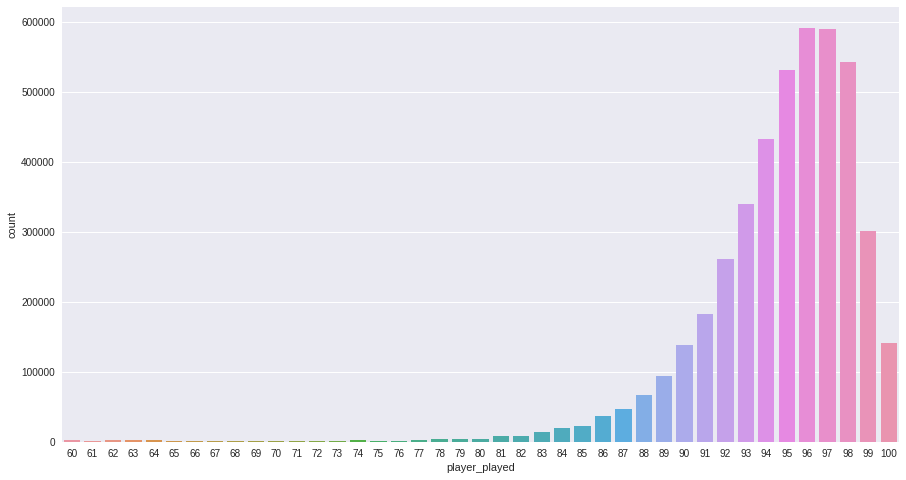

In [25]:
#Let's visualize the feature set.

import matplotlib.pyplot as plt
import seaborn as sns
# Plotting matches having player more that 60.
plt.subplots(figsize=(15,8))
sns.countplot(train[train['player_played']>=60]['player_played'])



### Outliers Detectors


### What are Outliers. 
Any data point or a set of data point which shows different  behavious compare to the rest of  data set.

---



![alt text](https://cdn-images-1.medium.com/max/1600/1*TbUF_HTQ6jOhO8EoPnmekQ.jpeg)

## Pubg Outliers 



- According to the rules of the game you need to find the players and then kill them. That's what the basic strategy of the game . 
- But few people do what they just hide and start their killing streak . But data tells everything.
- So we need to scrap out these cheaters.







































































## Distance Covered 

---

In pubg We have three way to cover a particular distance to reach to a destination.
### walkDistance.
![alt text](https://blog.turtlebeach.com/wp-content/uploads/2017/04/media_img_1490255446609-1024x576.jpg)

### swimDistance

![alt text](https://thumbs.gfycat.com/EvenSpiffyFerret-small.gif)

### rideDistance 

![alt text](https://i.ytimg.com/vi/atlOIN_stzI/maxresdefault.jpg)

 So ingeneral we have three mode.
 



In [0]:
#rideDistance
#walkDistance
#swimDistance

##  Find the cheaters|Outliers
To identify outliers we gonna do what . 
Create two new features .
 - Total Distance
 
 -  kills without moving

In [0]:
#total_distance   #train.
train['total_distance']=train.rideDistance+train.walkDistance+train.swimDistance


In [0]:
# total distance  #test
test['total_distance']=test.rideDistance+test.walkDistance+test.swimDistance

In [0]:
# kills_without_moving

#kills
#total_distance

#train
train['kills_without_moving']=((train['kills']>0)&(train['total_distance']==0))

#test
test['kills_without_moving']=((test['kills']>0)&(test['total_distance']==0))


Now we drop all those players who have kills the they didn't cover the some least distance.

In [30]:
# find the count.
train['kills_without_moving'].value_counts()


False    4445430
True        1535
Name: kills_without_moving, dtype: int64

In [31]:
# find the count for test data.

test['kills_without_moving'].value_counts()

False    1933863
True         311
Name: kills_without_moving, dtype: int64

So there are 1535 outliers in train data and 311 outliers in test data .



In [0]:
# drop them.

train.drop(train[train['kills_without_moving']==True].index,inplace=True)


test.drop(test[test['kills_without_moving']==True].index,inplace=True)


Now let's work on the given feature set of train and test data.

**roadKills** - Number of kills while in a vehicle.

In [33]:
# roadKills count


train['roadKills'].value_counts()




0     4432434
1       11247
2        1298
3         297
4          72
5          36
6          20
7          11
8           7
11          2
10          2
9           2
18          1
14          1
Name: roadKills, dtype: int64

In [0]:
# see most of the player have kills from  zero to 10 
# so to remove the outliers from our data we drop all the player who have more than 10 roadkills.



In [0]:
# drop all the road kills above 10


#test

train.drop(train[train['roadKills']>=10].index,inplace=True)

#test 

test.drop(test[test['roadKills']>=10].index,inplace=True)

**kills** - Number of enemy players killed.

In [35]:
# kills count

train['kills'].value_counts()

0     2529721
1      927648
2      472291
3      232280
4      124414
5       66480
6       37867
7       21744
8       12716
9        7581
10       4562
11       2756
12       1726
13       1108
14        742
15        468
16        319
17        226
18        159
19        105
20         94
22         74
21         61
23         40
24         40
26         24
25         24
28         22
27         15
33         12
29         11
30         11
31         11
35          6
36          6
38          6
34          5
37          5
41          5
53          4
32          4
39          4
40          4
42          3
43          2
44          2
46          2
55          2
56          2
57          2
45          1
47          1
48          1
49          1
50          1
66          1
65          1
72          1
Name: kills, dtype: int64

In [36]:
#test
test['kills'].value_counts()

0     1099421
1      404819
2      206319
3      101149
4       54100
5       28877
6       16468
7        9262
8        5278
9        3281
10       1902
11       1155
12        673
13        417
14        230
15        150
16        119
17         71
18         37
19         33
20         21
22         11
30         11
21          8
24          8
23          5
25          5
26          4
28          3
31          3
32          2
37          2
36          2
33          2
56          1
34          1
29          1
27          1
40          1
41          1
43          1
46          1
47          1
52          1
55          1
58          1
Name: kills, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


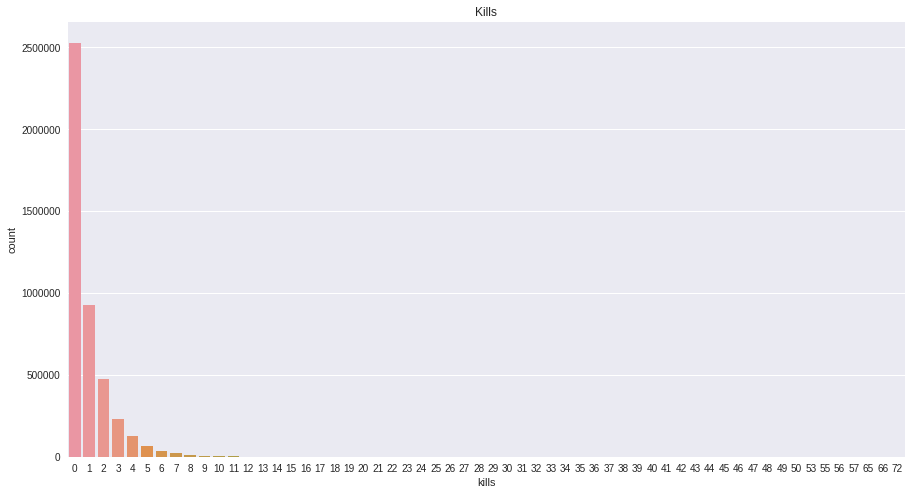

In [37]:
#Plot the kills data.

plt.subplots(figsize=(15,8))
sns.countplot(data=train,x=train['kills'])
plt.title('Kills')
plt.show()

See players who kills more that 35 are pretty rare so they all act as outliners. so lets drop all of them

In [0]:
# drop the outliers.

#train
train.drop(train[train['kills']>=35].index,inplace=True)

#test

test.drop(test[test['kills']>=35].index,inplace=True)

## Should we remove all these outliers from our dataset or not what's your take on that.

In DataScience their is no predefined strategy . Where you can say for sure this is the right way to do it.  All of us have different way, different methods and differnet openion.


--------------------------------

According to me in that particular case we have a millions of rows , So we can afford to loose few thousand . If it helps to create a better model.

.



**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat

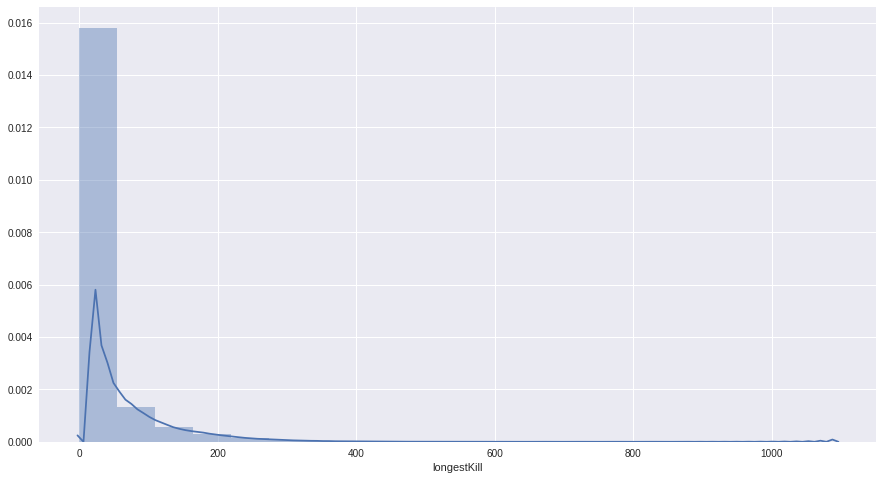

In [39]:
#longetKill 
#distplot
plt.subplots(figsize=(15,8))
sns.distplot(train['longestKill'],bins=20)


Most kills are made from a distance of 100 meters or closer. There are however some outliers who make a kill from more than 1km away. This is probably done by cheaters.

In [40]:
# Let's take a look at the players who make these shots. 
train[train['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,player_played,total_distance,kills_without_moving
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.9,5,1,1,5,...,0.00,0,1,3052.00,9,0,0.9231,88,3775.20,False
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.0,8,5,7,18,...,0.00,0,0,48.87,38,1500,0.5385,29,48.87,False
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.0,0,0,0,9,...,0.00,0,0,1264.00,26,0,1.0000,51,2981.00,False
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.0,17,5,0,3,...,0.00,0,0,29.21,30,1500,0.6000,41,29.21,False
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.8,0,0,0,51,...,0.00,0,0,1074.00,22,0,0.0000,61,3159.00,False
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.0,11,5,0,5,...,0.00,0,0,569.50,18,0,0.9091,86,569.50,False
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.3,0,0,2,45,...,0.00,0,0,832.50,9,1500,0.2857,58,832.50,False
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.0,0,7,0,1,...,0.00,0,0,2848.00,4,1500,0.9412,52,2848.00,False
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.0,0,4,11,11,...,0.00,0,0,235.30,41,0,0.5000,28,235.30,False
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.0,0,6,5,15,...,0.00,0,0,133.20,43,0,0.6000,42,133.20,False


20 player who have longestKill more than 1000m.

In [41]:
# Let's take a look at the players who make these shots. 
test[test['longestKill']>=1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,player_played,total_distance,kills_without_moving
15085,b2d7b5499c7fdd,c57312c6ebd390,5fb683abbf1f33,4,0,1119.0,0,2,3,11,...,0,0.0,0,0,1135.0,19,0,48,1190.4,False


In [0]:
# drop outliers.      


#train
train.drop(train[train['longestKill']>=1000].index,inplace=True)

#test

test.drop(test[test['longestKill']>=1000].index,inplace=True)

There is something fishy going on with these players. We are probably better off removing them from our dataset.

### Lets findout the Anomalies in travelling (rideDistance, walkDistance and swimDistance)

Let's check out anomalies in Distance travelled.


In [43]:
train[['rideDistance','walkDistance','swimDistance','total_distance']].head()

,rideDistance,walkDistance,swimDistance,total_distance
0,0.0000,244.80,0.00,244.8000
1,0.0045,1434.00,11.04,1445.0445
2,0.0000,161.80,0.00,161.8000
3,0.0000,202.70,0.00,202.7000
4,0.0000,49.75,0.00,49.7500


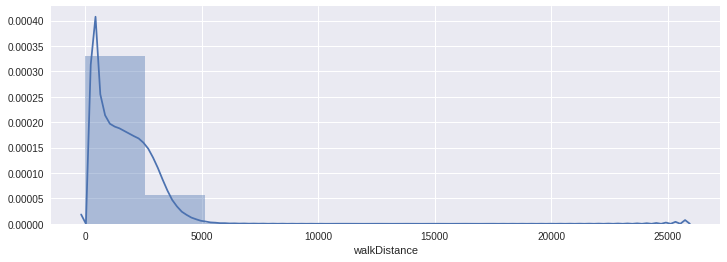

In [44]:
# plot walkDistance 

plt.figure(figsize=(12,4))
sns.distplot(train['walkDistance'], bins=10)
plt.show()

In [0]:
#Remove the outliers

#train
train.drop(train[train['walkDistance']>=10000].index,inplace=True)


#test
test.drop(test[test['walkDistance']>=10000].index,inplace=True)

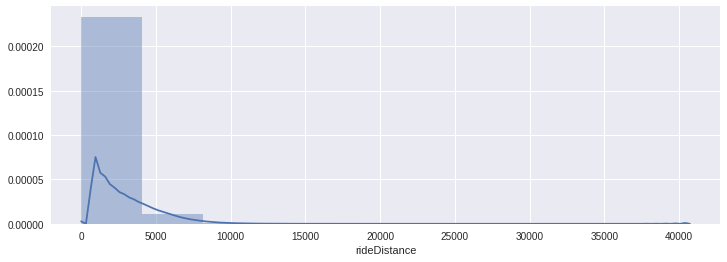

In [46]:
# plot rideDistance

plt.subplots(figsize=(12,4))
sns.distplot(train.rideDistance,bins=10)
plt.show()


In [0]:
#Remove the outliers.

#test

train.drop(train[train.rideDistance >=15000].index, inplace=True)

#test

test.drop(test[test.rideDistance >=15000].index, inplace=True)

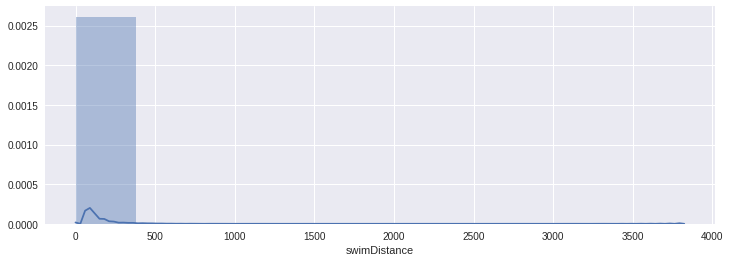

In [48]:
# swimDistance
plt.subplots(figsize=(12, 4))
sns.distplot(train.swimDistance,bins=10)



Very few people prefer to swim.

In [49]:
train[train['swimDistance']>=1000].shape

(138, 32)

In [0]:
#Remove the ouliers.

#train
train.drop(train[train.swimDistance>=1000].index,inplace=True)

#test
test.drop(test[test.swimDistance>=1000].index,inplace=True)

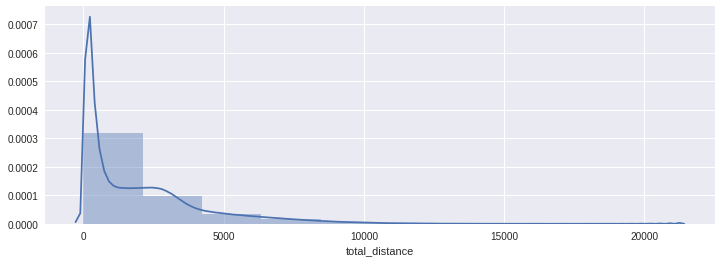

In [51]:
# total_distance
plt.subplots(figsize=(12,4))
sns.distplot(train.total_distance,bins=10)

In [52]:
train[train.total_distance>=15000].shape

(519, 32)

In [0]:
#Remove the outliers.

#train
train.drop(train[train.total_distance>=15000].index,inplace=True)

#test
test.drop(test[test.total_distance>=15000].index,inplace=True)



## Anomalies in weaponsAcquired

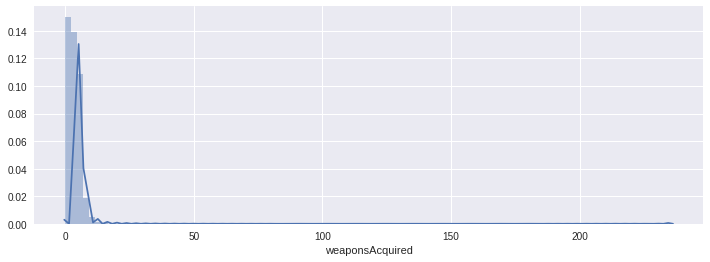

In [54]:
#weaponsAcquired
#distplot

plt.figure(figsize=(12,4))
sns.distplot(train['weaponsAcquired'], bins=100)
plt.show()

In [55]:
train[train.weaponsAcquired>=50].shape

(135, 32)

We should probably remove these outliers from our model. Do you agree?

Note that player '3f2bcf53b108c4' acquired 236 weapons in one game!

In [0]:
# remove the outliers.

#train
train.drop(train[train.weaponsAcquired>=50].index,inplace=True)

#test
test.drop(test[test.weaponsAcquired>=50].index,inplace=True)

## Anomalies in Heals
heals - Number of healing items used.

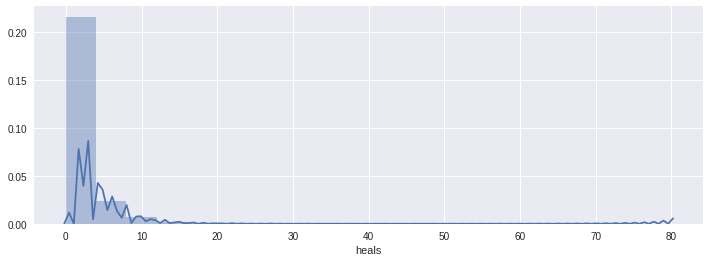

In [57]:
#heals 
#distplot

plt.subplots(figsize=(12,4))
sns.distplot(train.heals, bins=20)

In [58]:
train[train.heals>=40].shape

(134, 32)

In [0]:
# remove the outliers.

#train
train.drop(train[train.heals>=40].index,inplace=True)

#test

test.drop(test[test.heals>=40].index,inplace=True)



##  Final outcome after Removing all outliers

In [60]:
# Lets find the shape of training data
train.shape



(4443698, 32)

So the initial shape is (4446966, 29)   
And After removeing the outliers the new shape is  (4443698, -)

#### Something around 3000 rows we removed . Which is nothing compare to the number of rows we have.

## Categorical Variables

In [0]:
# Create the dummy variable for categorical variable present in our data set.
#matchType
#train

train=pd.get_dummies(train,columns=['matchType'])

#test

test=pd.get_dummies(test,columns=['matchType'])



In [62]:
train.shape

(4443698, 47)

Now If you guys planning to create dummy variable of matchId and groupId ..

For me it's like getting into a sucidal trap.

In [63]:
# Lets again check the data structure of both train and test data
train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4443698 entries, 0 to 4446965
Data columns (total 47 columns):
Id                            object
groupId                       object
matchId                       object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933174 entries, 0 to 1934173
Data columns (total 46 columns):
Id                            object
groupId                       object
matchId                       object
assists                       int64
boosts                        int64
damageDealt                   float64
DBNOs                         int64
headshotKills                 int64
heals                         int64
killPlace                     int64
killPoints                    int64
kills                         int64
killStreaks                   int64
longestKill                   float64
matchDuration                 int64
maxPlace                      int64
numGroups                     int64
rankPoints                    int64
revives                       int64
rideDistance                  float64
roadKills                     int64
swimDistance                  float64
teamKills                     int64
vehicleDestroys               int64
walkDistance

## Feature Selection

Feature selection methods can give you useful information on the relative importance or relevance of features for a given problem. You can use this information to create filtered versions of your dataset and increase the accuracy of your models.

## Why to perform feature selection?

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.





### Checking correlation is the fastest way to estimate the impact but it doesn't capture the actual contribution of the score.

But, correlation is naive, nearly primitive, method of feature selection. Consequently it will sometimes work (since data sometimes does follow the linear combination redundancy) and will fail miserably in many more complex tasks. There is no "golden" answer here. Correlation based feature selection is like logistic regression for classification - the easiest thing to try, but should not expect to solve any problem out there.

## One more step to make data more feasible for training.

In [0]:
#drop the all unnecessary columns

#train
train.drop(['kills_without_moving'],axis=1,inplace=True)


In [0]:
#test

test.drop(['kills_without_moving'],axis=1,inplace=True)

## Featrue selection  using algorithm

In [0]:
# feature selectionm using algorithm itself.
from sklearn.ensemble import RandomForestRegressor


In [0]:
#before that first drop some unnecessary columns.

#For train
#Id #groupId  # matchId

train.drop(['Id','groupId','matchId'],axis=1,inplace=True)

# For test
# Save the test Id 
test_id=test['Id']

test.drop(['Id','groupId','matchId'],axis=1,inplace=True)


In [69]:
train.shape

(4443698, 43)

In [70]:
test.shape

(1933174, 42)

### Sample data for training

In [0]:
# Take sample for debugging and exploration
sample = 500000
df_sample = train.sample(sample)



In [0]:
# Metric used for the PUBG competition (Mean Absolute Error (MAE))
from sklearn.metrics import mean_absolute_error

In [0]:
# Design model function. 

def score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [74]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 4013047 to 1919861
Data columns (total 43 columns):
assists                       500000 non-null int64
boosts                        500000 non-null int64
damageDealt                   500000 non-null float64
DBNOs                         500000 non-null int64
headshotKills                 500000 non-null int64
heals                         500000 non-null int64
killPlace                     500000 non-null int64
killPoints                    500000 non-null int64
kills                         500000 non-null int64
killStreaks                   500000 non-null int64
longestKill                   500000 non-null float64
matchDuration                 500000 non-null int64
maxPlace                      500000 non-null int64
numGroups                     500000 non-null int64
rankPoints                    500000 non-null int64
revives                       500000 non-null int64
rideDistance                  500000 non-null 

In [75]:
y=df_sample['winPlacePerc']
df = df_sample.drop(columns = ['winPlacePerc'])
df.shape

(500000, 42)

In [0]:
#train test split.

from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(df,y,test_size=0.3,random_state=40)




## Before training lets talk bit about randome forest regression algorithm.
Random Forest is a supervised learning algorithm , very flexible and easy to use .And it produce better result even without hyper-parameter tuning.
![alt text](https://cdn-images-1.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

Random Forest doc:
[RandomForest Doc ](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [77]:
#model with certaion parameter. Ramdon forest algorithm with default parameters.
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)

m1.fit(X_train, y_train)
score(m1)


['mae train: ', 0.0428168158465911, 'mae val: ', 0.06292893715434004]


In [0]:
# Find the important feature using random Forest algorithm.

importance=m1.feature_importances_

In [0]:
# Create a new Dataframe for the given feature with their importance.
data=pd.DataFrame(sorted(zip(m1.feature_importances_, df.columns)), columns=['Value','Feature'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


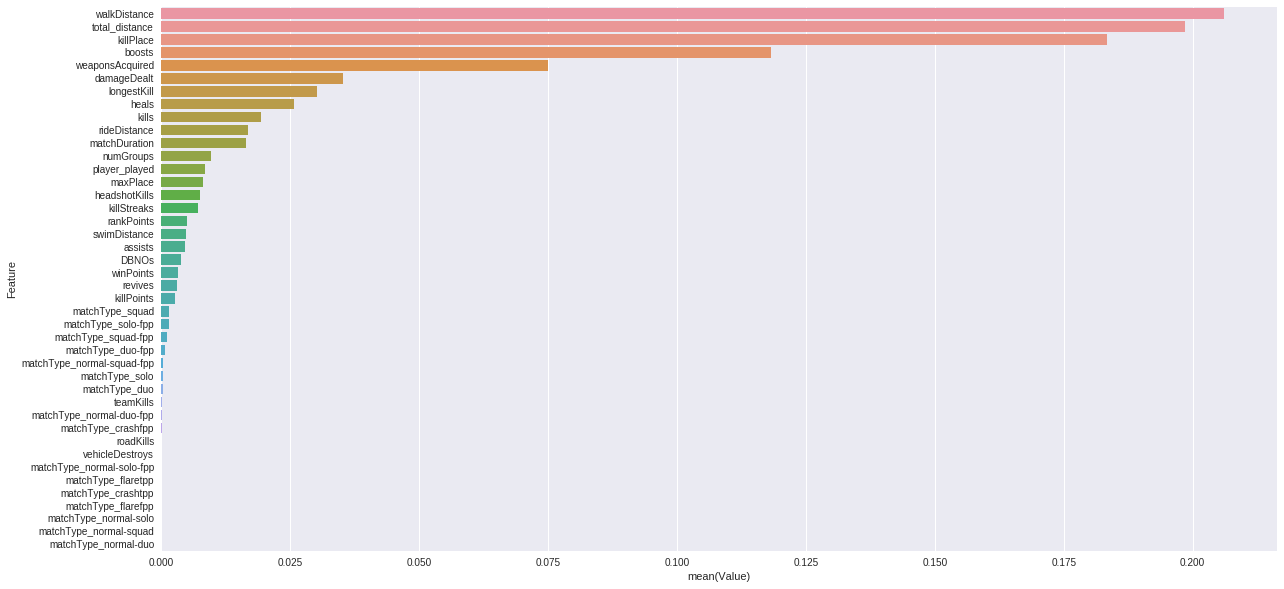

In [80]:
# Lets plot all the feature.

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=data.sort_values(by="Value", ascending=False))

In [0]:
# select top 25 features and re-train the model.


new_data=data.sort_values(by='Value',ascending=False)[:25]

In [82]:
new_data.head()

,Value,Feature
41,0.206070,walkDistance
40,0.198567,total_distance
39,0.183394,killPlace
38,0.118222,boosts
37,0.075067,weaponsAcquired


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


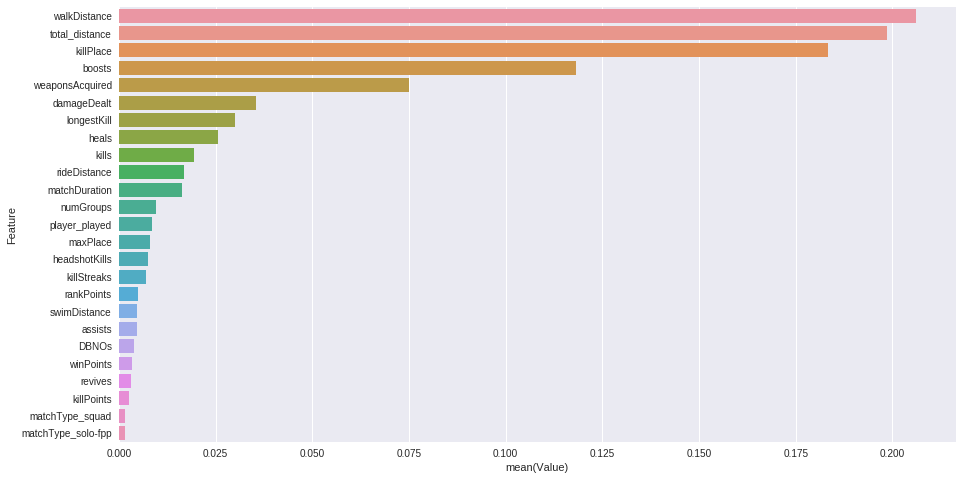

In [83]:
# Plot all the variables.
plt.subplots(figsize=(15,8))
sns.barplot(x='Value',y='Feature',data=new_data)

In [0]:
cols=new_data.Feature.values

In [85]:
cols
# so these are the top 25 set of feature

array(['walkDistance', 'total_distance', 'killPlace', 'boosts',
       'weaponsAcquired', 'damageDealt', 'longestKill', 'heals', 'kills',
       'rideDistance', 'matchDuration', 'numGroups', 'player_played',
       'maxPlace', 'headshotKills', 'killStreaks', 'rankPoints',
       'swimDistance', 'assists', 'DBNOs', 'winPoints', 'revives',
       'killPoints', 'matchType_squad', 'matchType_solo-fpp'],
      dtype=object)

So these are the top 25 features and we need to create new model based on these features.

## Recreate the model using sample data.

In [0]:
# train and validation data
X_train,X_valid,y_train,y_valid=train_test_split(df[cols],y,test_size=0.3,random_state=40)

In [87]:
X_train.shape
print(X_valid.shape)

(150000, 25)


In [88]:
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
score(m1)

['mae train: ', 0.03804379443764784, 'mae val: ', 0.06045273441256874]


# Now What

You guys must be thinking all seem to be perfectly working . Let's train the model for the complete data.

Here the problem came  ,

Google colab can handle that huge amoung of data for training. Because of tons of calculation is happeining in the backend. Due to which it ran out of memory.

We gonna use cloud services . I prefer AWS(amazon web services ) you can choose of your choice.


To learn more about how do we train model in cloud. Checkout the aws model for further training.